In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
accidents = pd.read_csv('accidents.csv')
autos = pd.read_csv('autos.csv')
concrete = pd.read_csv("concrete.csv")
customer = pd.read_csv("customer.csv")

In [69]:
autos.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


**Mathematical Transforms**

Relationships among numerical features are often expressed through mathematical formulas, which you'll frequently come across as part of your domain research. In Pandas, you can apply arithmetic operations to columns just as if they were ordinary numbers.

In the Automobile dataset are features describing a car's engine. Research yields a variety of formulas for creating potentially useful new features. The "stroke ratio", for instance, is a measure of how efficient an engine is versus how performant:

In [70]:
autos['stroke_ratio'] = autos.stroke / autos.bore

autos[['stroke', 'bore', 'stroke_ratio']].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


The more complicated a combination is, the more difficult it will be for a model to learn, like this formula for an engine's "displacement", a measure of its power:

In [71]:
autos['displeacement'] = (np.pi*((0.5*autos.bore)**2) * autos.stroke * autos.num_of_cylinders)

Data visualization can suggest transformations, often a "reshaping" of a feature through powers or logarithms. The distribution of WindSpeed in US Accidents is highly skewed, for instance. In this case the logarithm is effective at normalizing it:

In [72]:
print(accidents.head()) 
print(accidents.columns)

   Severity            StartTime              EndTime   StartLat    StartLng  \
0         2  2019-07-22 14:43:06  2019-07-22 16:22:19  34.789009  -82.483383   
1         2  2019-03-20 16:12:14  2019-03-20 16:41:05  40.998264  -76.650396   
2         3  2018-12-12 14:19:18  2018-12-12 14:48:56  33.461292 -112.082001   
3         2  2018-03-09 08:02:11  2018-03-09 08:49:15  42.288445  -87.924911   
4         2  2020-03-27 05:36:56  2020-03-27 06:36:48  36.229259  -86.594650   

   Distance             Street          City State  Zipcode  ...  Crossing  \
0     0.000        Highway 153    Greenville    SC    29611  ...     False   
1     0.472   Continental Blvd      Danville    PA    17821  ...     False   
2     0.000             I-10 W       Phoenix    AZ    85003  ...     False   
3     0.000      Oak Spring Rd  Libertyville    IL    60048  ...     False   
4     0.000   Saundersville Rd   Old Hickory    TN    37138  ...     False   

   GiveWay  Junction  NoExit  Railway  Roundabout 

In [73]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents['LogWindSpeed'] = accidents.WindSpeed.apply(np.log1p)


In [74]:
accidents[['WindSpeed','LogWindSpeed']]

,WindSpeed,LogWindSpeed
0,16.0,2.833213
1,9.2,2.322388
2,8.1,2.208274
3,5.8,1.916923
4,7.0,2.079442
...,...,...
99995,8.0,2.197225
99996,11.5,2.525729
99997,8.1,2.208274
99998,13.0,2.639057


The fig, axs = plt.subplots(1, 2, figsize=(8, 4)) line creates a figure with one row and two columns of subplots.

two KDE plots for your data. Replace accidents.WindSpeed and accidents.LogWindSpeed with your actual data. This code will produce a visual comparison of the density of the two features.

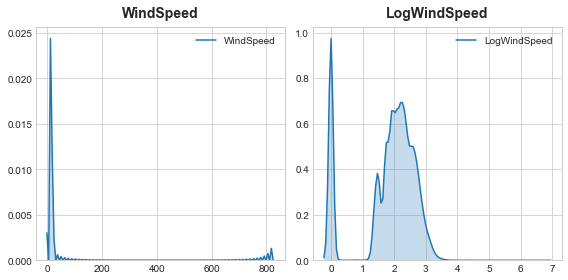

In [75]:
#plot a comparison
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,)


fig, axs = plt.subplots(1,2, figsize = (8,4))
axs[0].set_title("WindSpeed")
axs[1].set_title("LogWindSpeed")

sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1])

plt.show()

**Counts**

Features describing the presence or absence of something often come in sets, the set of risk factors for a disease, say. You can aggregate such features by creating a count.

These features will be binary (1 for Present, 0 for Absent) or boolean (True or False). In Python, booleans can be added up just as if they were integers.

In Traffic Accidents are several features indicating whether some roadway object was near the accident. This will create a count of the total number of roadway features nearby using the sum method:

In [76]:
accidents.head()

,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,...,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,LogWindSpeed
0,2,2019-07-22 14:43:06,2019-07-22 16:22:19,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,...,False,False,False,False,False,False,False,False,False,2.833213
1,2,2019-03-20 16:12:14,2019-03-20 16:41:05,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,...,False,False,False,False,False,False,False,False,False,2.322388
2,3,2018-12-12 14:19:18,2018-12-12 14:48:56,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,...,False,False,False,False,False,False,False,False,False,2.208274
3,2,2018-03-09 08:02:11,2018-03-09 08:49:15,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,...,False,False,False,False,False,False,False,False,False,1.916923
4,2,2020-03-27 05:36:56,2020-03-27 06:36:48,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,...,False,False,False,False,False,False,False,False,False,2.079442


accidents[roadway_features].sum() provides column-wise sums.

accidents[roadway_features].sum(axis=1) provides row-wise sums.

In [77]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]

accidents['RoadwayFeatures']= accidents[roadway_features].sum(axis=1)

accidents[ roadway_features + ['RoadwayFeatures']].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


You could also use a dataframe's built-in methods to create boolean values. In the Concrete dataset are the amounts of components in a concrete formulation. Many formulations lack one or more components (that is, the component has a value of 0). This will count how many components are in a formulation with the dataframe's built-in greater-than gt method:

The .gt(0) operation is used in pandas to perform element-wise comparison for values greater than 0. It returns a DataFrame of boolean values, where each element in the original DataFrame is checked to see if it is greater than 0. If the condition is true, the corresponding element in the resulting DataFrame is True, and if the condition is false, it's False.

In [78]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]

concrete['Components'] = concrete[components].gt(0).sum(axis=1)

concrete[components + ['Components']].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


**Building-Up and Breaking-Down Features**

Often you'll have complex strings that can usefully be broken into simpler pieces. Some common examples:

- ID numbers: '123-45-6789'

- Phone numbers: '(999) 555-0123'

- Street addresses: '8241 Kaggle Ln., Goose City, NV'

- Internet addresses: 'http://www.kaggle.com

- Product codes: '0 36000 29145 2'

- Dates and times: 'Mon Sep 30 07:06:05 2013'

Features like these will often have some kind of structure that you can make use of. US phone numbers, for instance, have an area code (the '(999)' part) that tells you the location of the caller. As always, some research can pay off here.

The str accessor lets you apply string methods like split directly to columns. The Customer Lifetime Value dataset contains features describing customers of an insurance company. From the Policy feature, we could separate the Type from the Level of coverage:

In [79]:
customer.head()

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


customer['Policy']: Selects the 'Policy' column from the 'customer' DataFrame.

.str.split(" ", expand=True): Applies the split method to each element in the 'Policy' column. It splits each value into parts using a space (" ") as the delimiter, and expand=True means that the split results should be expanded into separate columns. This results in a DataFrame with one column for each part created by the split operation.

For example, if the 'Policy' column contains values like "Policy 123 456" and "Policy 789," the result would be a DataFrame with two columns:

In [80]:
customer[['Type', 'Level']] = customer['Policy'].str.split(" ", expand = True)

In [81]:
customer[['Policy','Type','Level']].head(9)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3


You could also join simple features into a composed feature if you had reason to believe there was some interaction in the combination:

In [82]:
autos.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,stroke_ratio,displeacement
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9,111,5000,21,27,13495,0.772334,101.377976
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9,111,5000,21,27,16500,0.772334,101.377976
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9,154,5000,19,26,16500,1.294776,117.446531
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10,102,5500,24,30,13950,1.065831,108.695147
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8,115,5500,18,22,17450,1.065831,135.868934


In [84]:
autos['make_and_style'] = autos['make'] + "_" + autos['body_style']

autos[['make', 'body_style', 'make_and_style']].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


**Group Transforms**

Finally we have Group transforms, which aggregate information across multiple rows grouped by some category. With a group transform you can create features like: "the average income of a person's state of residence," or "the proportion of movies released on a weekday, by genre." If you had discovered a category interaction, a group transform over that categry could be something good to investigate.



In [85]:
customer.head(3)

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize,Type,Level
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Corporate,L3
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Personal,L3
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Personal,L3


Using an aggregation function, a group transform combines two features: a categorical feature that provides the grouping and another feature whose values you wish to aggregate. For an "average income by state", you would choose **State for the grouping feature,** **mean for the aggregation function,** **and Income for the aggregated feature.** To compute this in Pandas, we use the groupby and transform methods:

In [111]:
customer['AverageIncome_statebias'] = customer.groupby('State')['Income'].transform('mean')

customer[['State', 'Income', 'AverageIncome_statebias']].head()

,State,Income,AverageIncome_statebias
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083


In [114]:
customer.State.count()

9134

The mean function is a built-in dataframe method, which means we can pass it as a string to transform. Other handy methods include max, min, median, var, std, and count. Here's how you could calculate the frequency with which each state occurs in the dataset:

In [115]:
customer['StateFreq'] = customer.groupby('State')['State'].transform('count') / customer.State.count()


customer[['State', 'StateFreq']].head(5)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366


You could use a transform like this to create a "frequency encoding" for a categorical feature.

If you're using training and validation splits, to preserve their independence, it's best to create a grouped feature using only the training set and then join it to the validation set. We can use the validation set's merge method after creating a unique set of values with drop_duplicates on the training set:

In [120]:
customer.head(3)

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize,Type,Level,AverageIncome_statebias,StateFreq
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Corporate,L3,38122.733083,0.087366
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Personal,L3,37405.402231,0.186446
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Personal,L3,38369.605442,0.096562


In [140]:
df_train = customer.sample(frac=0.5) #randomly sample 50% of the rows from the 'customer'

#df_test that contains the rows from customer that are not present in the training set.
df_test = customer.drop(df_train.index) 

In [146]:
# Create the average claim amount by coverage type, on the training set
df_train['AverageClaim'] = df_train.groupby('Coverage')['ClaimAmount'].transform('mean')

# Merge the values into the validation set
df_test = df_test.merge(df_train[['Coverage', 'AverageClaim']].drop_duplicates())

df_test[['Coverage', 'AverageClaim']].head()

,Coverage,AverageClaim
0,Premium,628.711062
1,Premium,628.711062
2,Premium,628.711062
3,Premium,628.711062
4,Premium,628.711062


**Tips on Creating Features**

It's good to keep in mind your model's own strengths and weaknesses when creating features. Here are some guidelines:

>Linear models learn sums and differences naturally, but can't learn anything more complex.

>Ratios seem to be difficult for most models to learn. Ratio combinations often lead to some easy performance gains.

>Linear models and neural nets generally do better with normalized features. Neural nets especially need features scaled to values not too far from 0. Tree-based models (like random forests and XGBoost) can sometimes benefit from normalization, but usually much less so.

>Tree models can learn to approximate almost any combination of features, but when a combination is especially important they can still benefit from having it explicitly created, especially when data is limited.

>Counts are especially helpful for tree models, since these models don't have a natural way of aggregating information across many features at once.